## Import packages

In [43]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from tqdm import tqdm
import scanpy as sc

## Data preprocessing

In [44]:

def normalize(adata, highly_genes = None, size_factors=True, normalize_input=True, logtrans_input=True):
    sc.pp.filter_genes(adata, min_counts=1)
    sc.pp.filter_cells(adata, min_counts=1)
    if size_factors or normalize_input or logtrans_input:
        adata.raw = adata.copy()
    else:
        adata.raw = adata

    if size_factors:
        sc.pp.normalize_per_cell(adata)
        adata.obs['size_factors'] = adata.obs.n_counts / np.median(adata.obs.n_counts)
    else:
        adata.obs['size_factors'] = 1.0

    if logtrans_input:
        sc.pp.log1p(adata)

    if highly_genes != None:
        sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, n_top_genes = highly_genes, subset=True)

    if normalize_input:
        sc.pp.scale(adata)

    return adata

In [45]:
df = pd.read_csv('endoderm.csv', index_col= 0)
df.isnull().values.any()
df = df.T
df

,MKL2,CD109,ABTB1,MAST2,KAT5,WWC2,CD163,MYL2,UBE2Z,RGPD4,...,SNRNP48,ARMC3,DUSP28,INO80,NUP205,WDR33,EPSTI1,CLPTM1L,CCDC125,CATSPER3
H1_Exp1.001,10,6,0,0,0,84,0,0,18,0,...,84,0,0,0,239,101,0,22,32,0
H1_Exp1.002,162,2,28,133,7,5,0,0,146,4,...,40,0,0,187,231,201,0,84,52,0
H1_Exp1.003,3,166,0,41,52,305,0,0,106,0,...,21,0,0,6,169,23,0,19,110,0
H1_Exp1.004,42,9,1,0,20,41,0,0,9,0,...,12,0,0,49,90,164,0,52,73,1
H1_Exp1.006,0,7,0,0,0,142,0,0,14,5,...,41,0,0,26,240,181,0,2,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TB_Batch2.140,5,23,0,206,0,46,0,0,74,0,...,185,0,0,7,0,5,146,0,221,0
TB_Batch2.141,500,362,0,43,56,90,0,0,15,0,...,156,0,0,0,251,79,539,296,166,0
TB_Batch2.142,18,22,3,2,2,562,0,0,25,0,...,10,0,0,28,0,6,0,0,131,0
TB_Batch2.143,472,36,39,1,0,778,0,0,225,2,...,719,0,0,211,2,124,21,271,730,0


In [92]:
adata = sc.AnnData(df)
adata

AnnData object with n_obs × n_vars = 1018 × 19097

In [93]:
n_genes = 50  #select only the 50 most variable genes to impute
adata = normalize(adata, highly_genes=n_genes)
high_variance = adata.var.highly_variable.index

In [ ]:
# only select subset
# df = df.iloc[:50, :50]
df_sub = df.loc[:, high_variance]
df_sub

,GREM1,F2RL2,VTCN1,KIAA1199,F3,LEFTY2,ENPP1,ERBB4,DKK4,SERPINE2,...,CRHBP,CDH6,LEFTY1,CYP26A1,AXL,HSD3B1,MPL,DRD2,FZD5,MMP1
H1_Exp1.001,0,5,0,11,12,0,176,0,0,15,...,0,7,0,0,1130,0,23,0,78,0
H1_Exp1.002,0,2,0,0,38,0,389,0,0,17,...,0,4,0,0,235,0,31,0,10,0
H1_Exp1.003,0,9,0,0,35,43,407,0,0,12,...,0,7,0,0,464,0,35,0,87,0
H1_Exp1.004,0,51,0,0,49,0,186,0,0,56,...,0,25,0,0,790,0,50,0,90,0
H1_Exp1.006,0,4,0,35,1,139,294,0,0,16,...,0,43,65,0,590,0,65,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TB_Batch2.140,0,32,4333,0,659,0,1154,642,0,0,...,0,27,0,0,1132,0,56,0,0,0
TB_Batch2.141,327,249,2,0,42,0,400,0,0,1,...,0,38,0,0,2378,0,88,0,0,0
TB_Batch2.142,0,20,4492,0,8,0,2224,0,0,480,...,0,11,0,0,16774,0,48,0,1,0
TB_Batch2.143,0,25,6125,44,1432,0,1267,0,0,140,...,0,17,0,0,6637,0,140,0,205,0


## Baseline - Naive iterative imputation
In this part, we will treat all 0 entry as missing value and impute them.

In [48]:
mat = df_sub.values

In [ ]:
# # train test split
# from sklearn.model_selection import train_test_split
# X_train, X_test = train_test_split(df_sub, test_size=0.2, random_state=42)

In [ ]:
# initialization strategy: mean
%time
imp_mean = IterativeImputer(random_state=0, missing_values=0, min_value=0)
imp_mean.fit(mat)
transformed = imp_mean.transform(mat)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 10.7 µs


/home/dengyf2000/.pyenv/versions/3.8.18/envs/sc-env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
df_sub

,GREM1,F2RL2,VTCN1,KIAA1199,F3,LEFTY2,ENPP1,ERBB4,DKK4,SERPINE2,...,CRHBP,CDH6,LEFTY1,CYP26A1,AXL,HSD3B1,MPL,DRD2,FZD5,MMP1
H1_Exp1.001,0,5,0,11,12,0,176,0,0,15,...,0,7,0,0,1130,0,23,0,78,0
H1_Exp1.002,0,2,0,0,38,0,389,0,0,17,...,0,4,0,0,235,0,31,0,10,0
H1_Exp1.003,0,9,0,0,35,43,407,0,0,12,...,0,7,0,0,464,0,35,0,87,0
H1_Exp1.004,0,51,0,0,49,0,186,0,0,56,...,0,25,0,0,790,0,50,0,90,0
H1_Exp1.006,0,4,0,35,1,139,294,0,0,16,...,0,43,65,0,590,0,65,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TB_Batch2.140,0,32,4333,0,659,0,1154,642,0,0,...,0,27,0,0,1132,0,56,0,0,0
TB_Batch2.141,327,249,2,0,42,0,400,0,0,1,...,0,38,0,0,2378,0,88,0,0,0
TB_Batch2.142,0,20,4492,0,8,0,2224,0,0,480,...,0,11,0,0,16774,0,48,0,1,0
TB_Batch2.143,0,25,6125,44,1432,0,1267,0,0,140,...,0,17,0,0,6637,0,140,0,205,0


In [ ]:
pd.DataFrame(transformed)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,435.077262,5.0,861.547168,11.000000,12.0,0.000000,176.0,2040.281063,1293.893560,15.000000,...,0.100418,7.0,338.631983,530.745506,1130.0,941.914351,23.0,201.584157,78.000000,622.123951
1,599.795366,2.0,643.323189,795.281516,38.0,746.179506,389.0,4061.582161,808.963142,17.000000,...,0.044908,4.0,230.296488,642.408837,235.0,738.967498,31.0,157.976158,10.000000,458.136151
2,465.089618,9.0,871.047530,424.979589,35.0,43.000000,407.0,1486.667832,1239.898633,12.000000,...,0.115612,7.0,105.463627,1371.985154,464.0,11.176482,35.0,141.044969,87.000000,245.666252
3,331.413684,51.0,684.334818,323.580284,49.0,275.956121,186.0,4108.270920,1021.872067,56.000000,...,0.065077,25.0,167.017060,492.266686,790.0,1268.036025,50.0,189.900472,90.000000,316.496479
4,208.096622,4.0,18.940886,35.000000,1.0,139.000000,294.0,4198.895734,999.087919,16.000000,...,516.489284,43.0,65.000000,222.646983,590.0,850.067901,65.0,144.752072,11.000000,179.158208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1387.467994,32.0,4333.000000,1233.043489,659.0,4131.373159,1154.0,642.000000,2969.797189,851.338362,...,0.702777,27.0,562.477745,0.945774,1132.0,193.285057,56.0,0.000000,2142.981493,0.004611
1014,327.000000,249.0,2.000000,971.470247,42.0,117.339176,400.0,7768.908965,1728.341575,1.000000,...,1366.382187,38.0,273.103781,1513.110105,2378.0,254.181756,88.0,0.000000,1954.330483,297.935720
1015,4647.649484,20.0,4492.000000,778.134456,8.0,3389.207341,2224.0,3900.302846,1917.319597,480.000000,...,0.990043,11.0,19.335951,355.117236,16774.0,17.391551,48.0,0.000000,1.000000,1816.177481
1016,2466.576448,25.0,6125.000000,44.000000,1432.0,0.000000,1267.0,5281.158843,3456.904447,140.000000,...,1.057347,17.0,45.495840,3.439420,6637.0,78.658578,140.0,350.031732,205.000000,148.067608


In [ ]:
## we can observe negative value, transfer negative value to 0
# transformed[transformed < 0] = 0
transformed[transformed < 0] # there are no negative predictions

array([], dtype=float64)

## Clustering with UMAP and t-SNE

In [76]:
# plotting tools 
# !python -m pip install colorcet
import colorcet as cc
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

#### Generating cell labels

In [53]:
# adata.obs['Group'] = 
Y = [label.split("_")[0] for label in df_sub.index.to_list()]
data = transformed

In [94]:
def get_embedding(data):
    """ Function to compute the UMAP embedding"""
    data_scaled = StandardScaler().fit_transform(data)

    embedding = umap.UMAP(n_neighbors=10,
                            min_dist=0.5,
                            metric='correlation',
                            random_state=16).fit_transform(data_scaled)
    return embedding

def draw_umap(embedding, label):
    contour_c = '#444444'
    labelsize = 25
    label = Y
    palette = sns.color_palette(cc.glasbey, n_colors=len(np.unique(label)))

    fig, ax = plt.subplots(figsize=(20, 15))

    plt.xlim([np.min(embedding[:, 0]) - 0.5, np.max(embedding[:, 0]) + 1.5])
    plt.ylim([np.min(embedding[:, 1]) - 0.5, np.max(embedding[:, 1]) + 0.5])

    plt.xlabel('UMAP 1', fontsize=labelsize)
    plt.ylabel('UMAP 2', fontsize=labelsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # plt.scatter(embedding[:, 0], embedding[:, 1], lw=0, , label=label, alpha=1.0, s=180, linewidth=2)
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=label, 
                hue_order=list(np.unique(label)), palette=palette)
    leg = plt.legend(prop={'size': labelsize}, loc='upper right', markerscale=2.00)
    leg.get_frame().set_alpha(0.9)
    plt.setp(ax, xticks=[], yticks=[])
    plt.show()
    
    

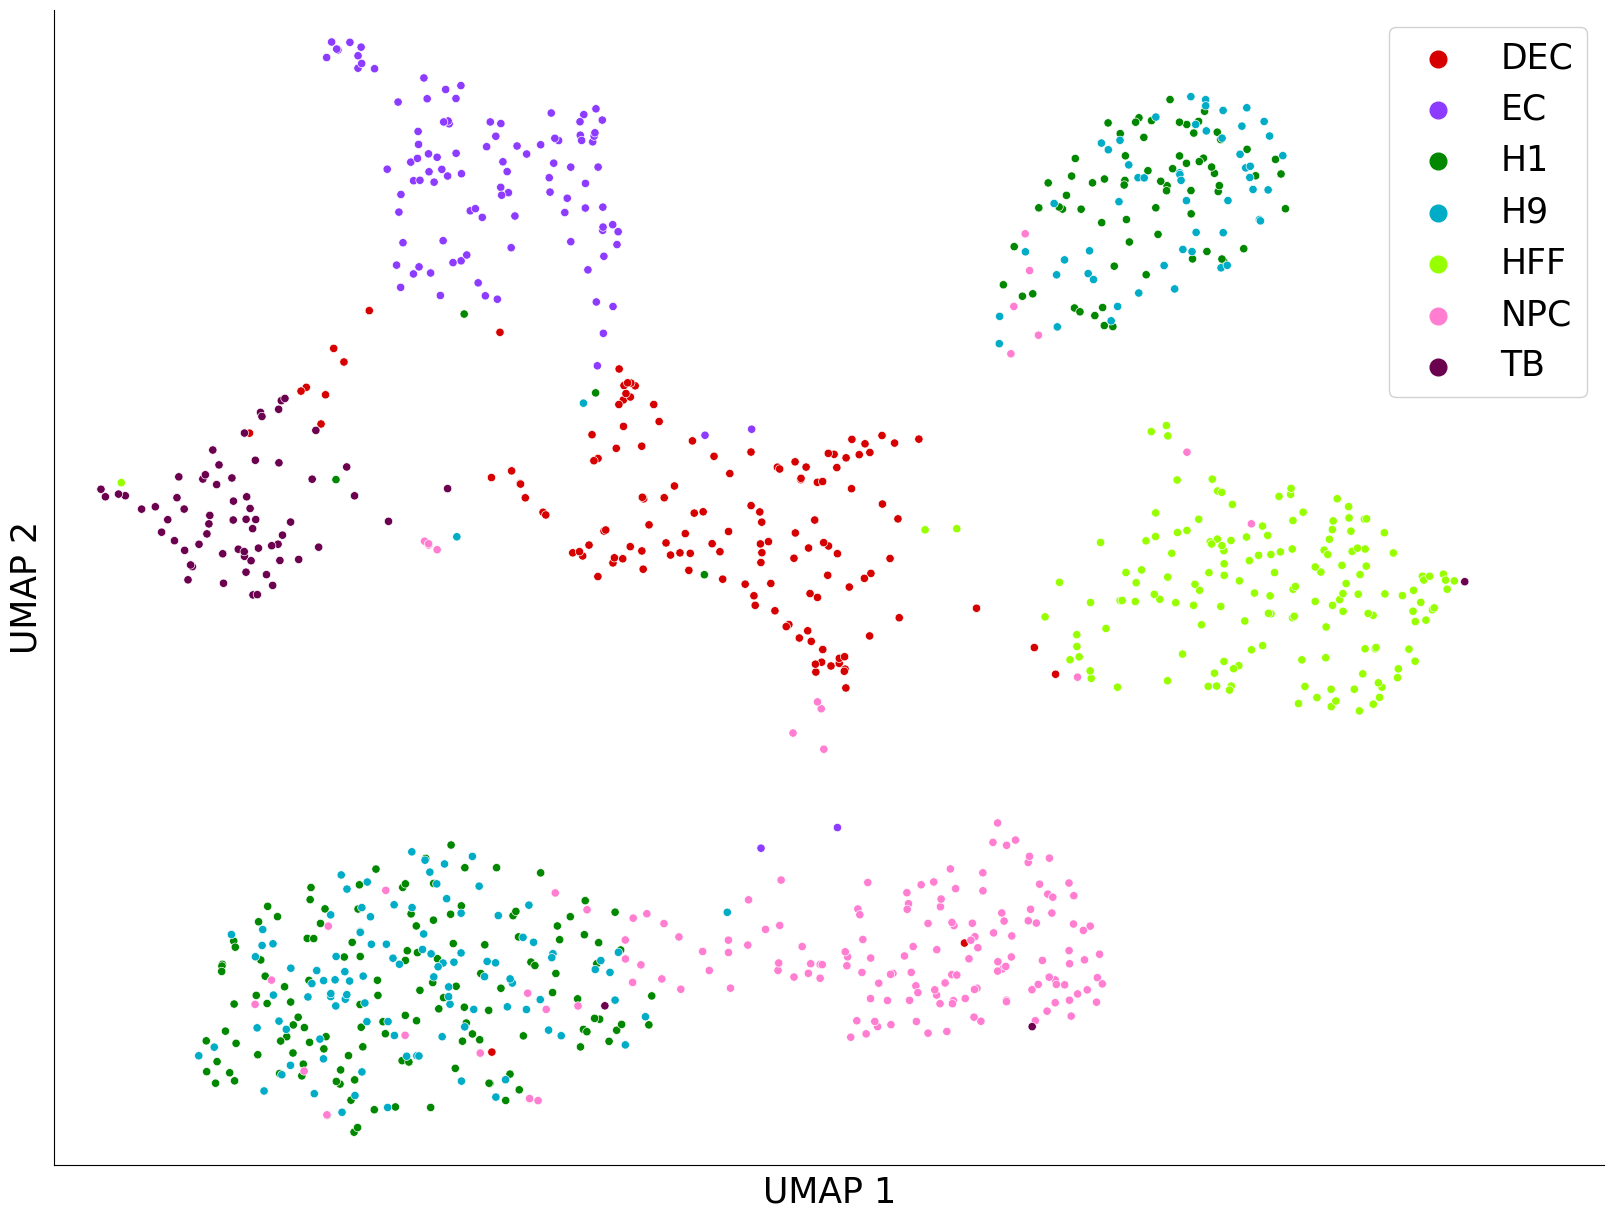

In [95]:
np.random.seed(1111)
# embedding = get_embedding(data)
draw_umap(embedding, Y)

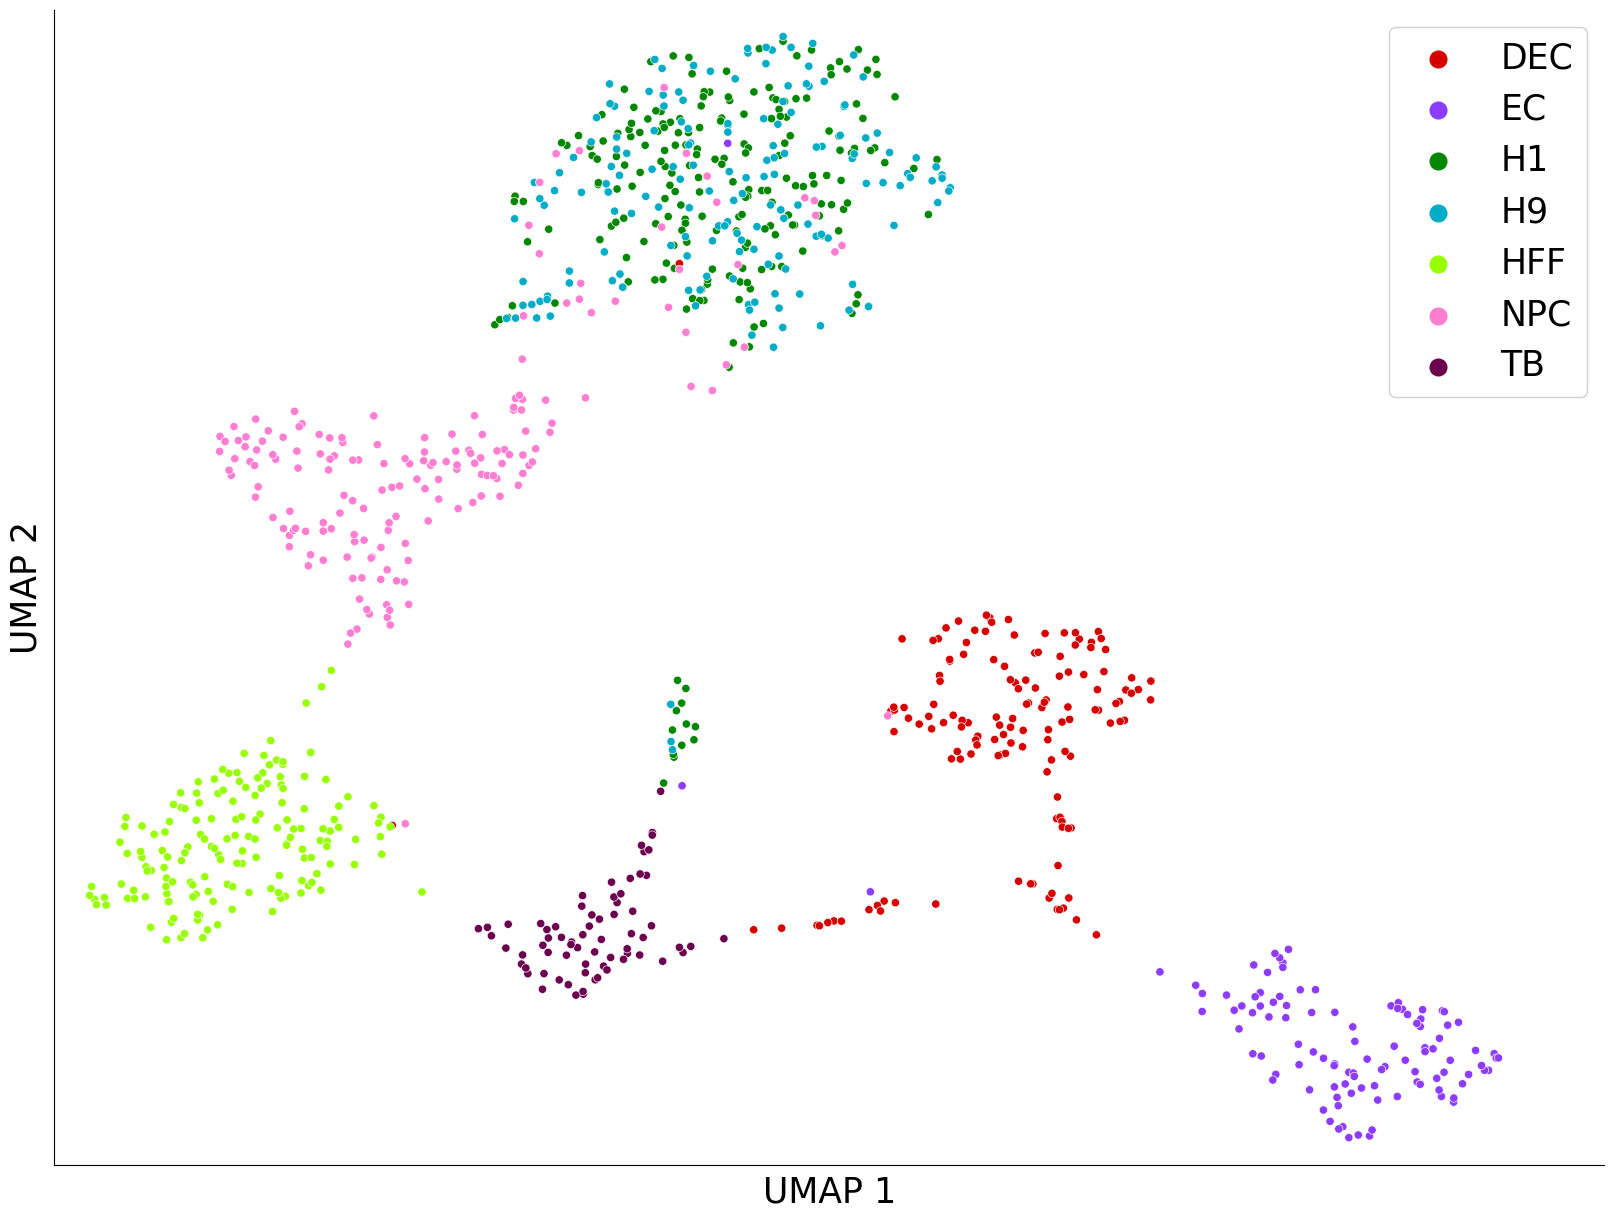

In [96]:
# embedding_ori = get_embedding(mat)
draw_umap(embedding_ori, Y)